<a href="https://colab.research.google.com/github/marcello-calabrese/IBM-Data-Science-Capstone-Project/blob/main/London_Brazilian_restaurant_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identify A Strategic Location to **Open a Brazilian take away restaurant** in London, United Kingdom

### Introduction/Business problem

 The success of establishing a new restaurant depends on several factors: demand, brand loyalty, quality of food, competition, and so on. In most cases, a restaurant's location plays an essential determinant for its success. Hence, it is advantageous and of utmost importance to determine the most strategic location for establishment in order to maximize business profits. 
Whether you’re opening your first full-service restaurant, it’s important to understand what to look out for when choosing a new restaurant location. For seasoned restaurateurs, you may have a successful location where you are but how much of that success is inadvertently down to accidental—or purposeful—restaurant location choice? The answer may be it has everything to do with it. 

### Problem

- Brazilian family of chefs would like to open a Brazilian take away restaurants, selling Brazilian traditional food such as pizza katupiri', pastels, picanha in London.
-Objective is to identify the optimal neighborhood location to open.    
Key factors to consider are: spending power of the London population, distribution of Brazilian ethnic group, competition, trafficked areas.
- To identify the right London neighborhood, we are going to use Foursquare API, data scraping, geopy, scikit learn for the clustering model building and matplotlib/seaborn to visualize data during our EDA (Exploratory Data Analysis)



### Data

The neighbourhoods alongside their respective postal codes, boroughs and the geographical coordinates, population and income for each neighborhood will be scraped from here: https://www.doogal.co.uk/UKPostcodesCSV.ashx?area=London0 . 
For returning the number of Brazilian restaurants in the vicinity of each neighbourhood, we will be utilizing Foursquare API, more specifically, its explore function. 


### Import Data and key libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import London postocodes.csv

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving London postcodes.csv to London postcodes.csv


In [2]:
#import io

df1 = pd.read_csv('/content/drive/MyDrive/London postcodes.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### **Data Cleaning**

In [59]:
df1.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Terminated,Parish,National Park,Population,Households,Built up area,Built up sub-division,Lower layer super output area,Rural/urban,Region,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2016-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,71,5,E01000675,NaN,E02000144,Bromley South,E43000196,E00003264,E14000604,24305,1,0,2021-05-21,Bromley South,0.218254,BR,BR1,Metropolitan Police,Thames Water,9F32C228+J5,63100,NaN,London
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2012-03-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 008B,Urban major conurbation,London,71,4,E01000676,NaN,E02000134,Bromley North & Sundridge,E43000196,E00003255,E14000604,13716,1,0,2021-05-21,Bromley North,0.253666,BR,BR1,Metropolitan Police,Thames Water,9F32C248+G3,56100,NaN,London
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2014-09-01,2017-09-01,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,53,5,E01000675,NaN,E02000144,Bromley South,E43000196,E00003264,E14000604,24305,1,1,2021-05-21,Bromley South,0.044559,BR,BR1,Metropolitan Police,NaN,9F32C228+2M,63100,NaN,London
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2008-08-01,NaN,"Bromley, unparished area",NaN,34.0,21.0,Greater London,Bromley,Bromley 018C,Urban major conurbation,London,71,4,E01000677,NaN,E02000144,Bromley South,E43000196,E00003266,E14000604,20694,1,0,2021-05-21,Bromley North,0.462939,BR,BR1,Metropolitan Police,Thames Water,9F32C237+RM,63100,NaN,London
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2015-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,58,5,E01000675,NaN,E02000144,Bromley South,E43000196,E00003264,E14000604,24305,1,0,2021-05-21,Bromley South,0.227662,BR,BR1,Metropolitan Police,Thames Water,9F32C227+HX,63100,NaN,London


### Now we have a look to the dataset, to understand how many rows, columns, there are in the dataset. From the above we can see luckily that we have postcode, latitude and longitude, key elements for the creation of the map later

In [60]:
# check how many columns and row and the type of data

df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324634 entries, 0 to 324633
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Postcode                        324634 non-null  object 
 1   In Use?                         324634 non-null  object 
 2   Latitude                        324634 non-null  float64
 3   Longitude                       324634 non-null  float64
 4   Easting                         324634 non-null  int64  
 5   Northing                        324634 non-null  int64  
 6   Grid Ref                        324634 non-null  object 
 7   County                          324634 non-null  object 
 8   District                        324634 non-null  object 
 9   Ward                            324634 non-null  object 
 10  District Code                   324634 non-null  object 
 11  Ward Code                       324634 non-null  object 
 12  Country         

### To have an idea of the different areas of London we take a deeper look of the columns District and Ward

In [61]:
# We run a unique value  to check the unique districts

df1['District'].unique()

array(['Bromley', 'Lewisham', 'Lambeth', 'Croydon', 'Greenwich',
       'Havering', 'Camden', 'Sutton', 'Merton', 'Bexley',
       'Tower Hamlets', 'City of London', 'Hackney', 'Waltham Forest',
       'Redbridge', 'Newham', 'Enfield', 'Islington', 'Westminster',
       'Barnet', 'Brent', 'Ealing', 'Harrow', 'Hillingdon',
       'Barking and Dagenham', 'Kingston upon Thames',
       'Richmond upon Thames', 'Haringey', 'Hammersmith and Fulham',
       'Southwark', 'Kensington and Chelsea', 'Wandsworth', 'Hounslow'],
      dtype=object)

In [62]:
# Let's now check the value counts of Districts

df1['District'].value_counts()

Westminster               31087
Camden                    16109
Barnet                    16092
Islington                 13287
Croydon                   13169
Southwark                 12318
Ealing                    11476
Bromley                   11338
Brent                     10571
Wandsworth                10564
Lambeth                   10490
Hillingdon                10460
Tower Hamlets             10268
Enfield                    9944
Hounslow                   9202
Harrow                     8630
Kensington and Chelsea     8499
Lewisham                   8357
Richmond upon Thames       7924
Haringey                   7883
Havering                   7847
Greenwich                  7781
Redbridge                  7779
Newham                     7285
Hammersmith and Fulham     7191
Hackney                    6907
City of London             6802
Waltham Forest             6621
Bexley                     6402
Sutton                     5982
Merton                     5912
Kingston

In [7]:
# We run a unique value to check the unique Wards

df1['Ward'].unique()

array(['Bromley Town', 'Shortlands', 'Bickley', 'Plaistow and Sundridge',
       'Downham', 'Whitefoot', 'Streatham South', 'Copers Cope', 'Darwin',
       'Bromley Common and Keston', 'Hayes and Coney Hall', 'Clock House',
       'Kelsey and Eden Park', 'Penge and Cator', 'Bellingham',
       'West Wickham', 'Shirley South', 'Petts Wood and Knoll',
       'Orpington', 'Farnborough and Crofton', 'Cray Valley West',
       'Cray Valley East', 'Chislehurst', 'Chelsfield and Pratts Bottom',
       'Mottingham and Chislehurst North', 'Coldharbour and New Eltham',
       'Harold Wood', 'Gooshays', "King's Cross", 'New Addington South',
       'New Addington North', 'Addiscombe West', 'Fairfield',
       'Broad Green', 'Waddon', 'South Croydon', 'Selhurst',
       'Bensham Manor', 'West Thornton', 'Beddington North',
       'Beddington South', 'Selsdon & Addington Village',
       'Park Hill & Whitgift', 'Shirley North', 'Addiscombe East',
       'Woodside', 'Selsdon Vale & Forestdale', 'San

In [8]:
# Let's check same thing (value counts) for Ward

df1['Ward'].value_counts()

West End                     12645
St James's                    4232
Clerkenwell                   4218
Marylebone High Street        4045
Holborn and Covent Garden     3542
                             ...  
Bread Street                   124
Queenhithe                     107
Cripplegate                     88
Aldersgate                      78
Portsoken                       76
Name: Ward, Length: 638, dtype: int64

### From the check above, we might have to choose to drop Ward column, but let's check the other columns we need to drop that are not needed for our analysis

In [9]:
df1.columns

Index(['Postcode', 'In Use?', 'Latitude', 'Longitude', 'Easting', 'Northing',
       'Grid Ref', 'County', 'District', 'Ward', 'District Code', 'Ward Code',
       'Country', 'County Code', 'Constituency', 'Introduced', 'Terminated',
       'Parish', 'National Park', 'Population', 'Households', 'Built up area',
       'Built up sub-division', 'Lower layer super output area', 'Rural/urban',
       'Region', 'Altitude', 'London zone', 'LSOA Code', 'Local authority',
       'MSOA Code', 'Middle layer super output area', 'Parish Code',
       'Census output area', 'Constituency Code',
       'Index of Multiple Deprivation', 'Quality', 'User Type', 'Last updated',
       'Nearest station', 'Distance to station', 'Postcode area',
       'Postcode district', 'Police force', 'Water company', 'Plus Code',
       'Average Income', 'Sewage Company', 'Travel To Work Area'],
      dtype='object')

### Probably too many columns that we don't need for our project such as 'Sewage Company', 'Police force' and others. For geospatial data and the clustering later I chose to keep only: Postcode, Latitute, Longitude, District, Population, Households, Distance to station, Average Income

In [13]:
# Dropping columns

col_drop = ['In Use?', 'Easting', 'Northing', 'Grid Ref', 'County', 'Ward', 'District Code', 'Ward Code', 'Country', 'County Code', 'Constituency', 'Introduced', 'Terminated',
       'Parish', 'National Park', 'Built up area', 'Built up sub-division', 'Lower layer super output area', 'Rural/urban', 'Region', 'Altitude', 'London zone', 'LSOA Code', 'Local authority',
       'MSOA Code', 'Middle layer super output area', 'Parish Code', 'Census output area', 'Constituency Code', 'Index of Multiple Deprivation', 'Quality', 'User Type', 'Last updated',
       'Nearest station', 'Postcode area', 'Postcode district', 'Police force', 'Water company', 'Plus Code', 'Sewage Company', 'Travel To Work Area']

In [63]:
#create a copy of the dataframe just in case of wrong dropping

df2 = df1.copy()

In [64]:
df2.drop(columns=col_drop, axis=1, inplace=True)

In [65]:
df2.head()

,Postcode,Latitude,Longitude,District,Population,Households,Distance to station,Average Income
0,BR1 1AA,51.401546,0.015415,Bromley,NaN,NaN,0.218254,63100
1,BR1 1AB,51.406333,0.015208,Bromley,NaN,NaN,0.253666,56100
2,BR1 1AD,51.400057,0.016715,Bromley,NaN,NaN,0.044559,63100
3,BR1 1AE,51.404543,0.014195,Bromley,34.0,21.0,0.462939,63100
4,BR1 1AF,51.401392,0.014948,Bromley,NaN,NaN,0.227662,63100


In [66]:
# Now for a matter of having a cleaned and easy to read dataframe, I will move the column District, after Postcode

first_column = df2.pop('District')

df2.insert(1, 'District', first_column)

df2

,Postcode,District,Latitude,Longitude,Population,Households,Distance to station,Average Income
0,BR1 1AA,Bromley,51.401546,0.015415,NaN,NaN,0.218254,63100
1,BR1 1AB,Bromley,51.406333,0.015208,NaN,NaN,0.253666,56100
2,BR1 1AD,Bromley,51.400057,0.016715,NaN,NaN,0.044559,63100
3,BR1 1AE,Bromley,51.404543,0.014195,34.0,21.0,0.462939,63100
4,BR1 1AF,Bromley,51.401392,0.014948,NaN,NaN,0.227662,63100
...,...,...,...,...,...,...,...,...
324629,WD3 8UX,Hillingdon,51.624762,-0.494021,NaN,NaN,2.226450,54200
324630,WD3 8UZ,Hillingdon,51.626955,-0.494143,22.0,15.0,2.048740,54200
324631,WD3 8XD,Hillingdon,51.628575,-0.499204,2.0,1.0,2.191290,54200
324632,WD6 2RN,Barnet,51.643292,-0.255958,11.0,6.0,1.960300,58000


In [67]:
# Looking at the data frame, we don't need the Postcode column either as we have District with Lat and Lon, so we drop it.

df2.drop(['Postcode'], axis=1, inplace=True)
df2

,District,Latitude,Longitude,Population,Households,Distance to station,Average Income
0,Bromley,51.401546,0.015415,NaN,NaN,0.218254,63100
1,Bromley,51.406333,0.015208,NaN,NaN,0.253666,56100
2,Bromley,51.400057,0.016715,NaN,NaN,0.044559,63100
3,Bromley,51.404543,0.014195,34.0,21.0,0.462939,63100
4,Bromley,51.401392,0.014948,NaN,NaN,0.227662,63100
...,...,...,...,...,...,...,...
324629,Hillingdon,51.624762,-0.494021,NaN,NaN,2.226450,54200
324630,Hillingdon,51.626955,-0.494143,22.0,15.0,2.048740,54200
324631,Hillingdon,51.628575,-0.499204,2.0,1.0,2.191290,54200
324632,Barnet,51.643292,-0.255958,11.0,6.0,1.960300,58000


### Checking the  Nan values: Data not assigned or missing values will be removed

In [68]:
# checking how many missing values we have in the dataframe

df2.isnull().sum()

District                    0
Latitude                    0
Longitude                   0
Population             183785
Households             183785
Distance to station         0
Average Income              0
dtype: int64

### Population and Households have the most missing values, we need to drop them as they will be important later to build the clustering model

In [69]:
# Dropping Nan values 

df2.dropna(how='any', axis=0, inplace=True)
df2

,District,Latitude,Longitude,Population,Households,Distance to station,Average Income
3,Bromley,51.404543,0.014195,34.0,21.0,0.462939,63100
13,Bromley,51.408058,0.015874,38.0,37.0,0.083058,63100
26,Bromley,51.409191,0.010068,1.0,1.0,0.489492,56100
39,Bromley,51.400462,0.016716,4.0,4.0,0.067905,63100
41,Bromley,51.401684,0.015705,14.0,6.0,0.219358,63100
...,...,...,...,...,...,...,...
324628,Hillingdon,51.623983,-0.495253,18.0,5.0,2.347240,54200
324630,Hillingdon,51.626955,-0.494143,22.0,15.0,2.048740,54200
324631,Hillingdon,51.628575,-0.499204,2.0,1.0,2.191290,54200
324632,Barnet,51.643292,-0.255958,11.0,6.0,1.960300,58000


In [70]:
#now we need to reset the index as we dropped quite few rows
df2.reset_index(drop=True, inplace=True)
df2

,District,Latitude,Longitude,Population,Households,Distance to station,Average Income
0,Bromley,51.404543,0.014195,34.0,21.0,0.462939,63100
1,Bromley,51.408058,0.015874,38.0,37.0,0.083058,63100
2,Bromley,51.409191,0.010068,1.0,1.0,0.489492,56100
3,Bromley,51.400462,0.016716,4.0,4.0,0.067905,63100
4,Bromley,51.401684,0.015705,14.0,6.0,0.219358,63100
...,...,...,...,...,...,...,...
140844,Hillingdon,51.623983,-0.495253,18.0,5.0,2.347240,54200
140845,Hillingdon,51.626955,-0.494143,22.0,15.0,2.048740,54200
140846,Hillingdon,51.628575,-0.499204,2.0,1.0,2.191290,54200
140847,Barnet,51.643292,-0.255958,11.0,6.0,1.960300,58000


### To simplify the visualization of the data and the maps we have to create a sample of 100 data.

In [71]:
df3 = df2.sample(n=100, replace=True, random_state=1)

In [72]:
df3.shape

(100, 7)

In [73]:
df3['District'].unique()

array(['Westminster', 'Bromley', 'Hackney', 'Lambeth', 'Brent',
       'Richmond upon Thames', 'Waltham Forest', 'Kensington and Chelsea',
       'Enfield', 'Barnet', 'Newham', 'Wandsworth', 'Southwark', 'Harrow',
       'Hounslow', 'Sutton', 'Hillingdon', 'Haringey', 'Lewisham',
       'Havering', 'Merton', 'Ealing', 'Camden', 'Islington', 'Greenwich',
       'Croydon', 'Kingston upon Thames', 'Bexley',
       'Barking and Dagenham', 'Tower Hamlets', 'Hammersmith and Fulham'],
      dtype=object)

### Now we create a map of London with Folium and Geopy

In [25]:
# installing geopy and Folium


!pip install geopy
!pip install Folium

In [74]:
# get location of London first, using geopy

from geopy.geocoders import Nominatim
address = 'London'

geolocator = Nominatim(user_agent='capstone_marce')
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

print('The coordinates of London are: {}, {}'.format(latitude, longitude))

The coordinates of London are: 51.5073219, -0.1276474


In [75]:
# Create Folium mapping

import folium

map_London = folium.Map(location=[latitude, longitude], zoom_start=11)

# Adding markers to the London map

for lat, lng, district in zip(df3['Latitude'], df3['Longitude'], df3['District']):
  label = '{}'.format(district)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat, lng],
      radius = 8,
      color = 'blue',
      popup = label,
      fill_color = '#3186cc',
      fill_opacity = 0.7,
      fill = True
  ).add_to(map_London)

map_London

### Looking at the map above, we got a representation of each neighbourhood around London

### Now we explore the neighbourhood using Foursquare API 

In [76]:
#@title
# define Foursquare API credentials and version
CLIENT_ID = 'Z5R30YV2S44XZOKFOBIH4NOBKDNK50UM5JEUGWC51TBFGWKY' # your Foursquare ID
CLIENT_SECRET = 'QSHHNLLS50BFLHHLQX2PZP3LZFAMCZ401MLBXDZUNR24FHVE' # your Foursquare Secret
VERSION = '20210601' # Foursquare API version

### Get the top 100 venues that are in London within a radius of 1500 meters

In [77]:
import requests
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
  venues_list = []
  for name, lat, lng in zip(names, latitudes, longitudes):
    print(name)

    #create the API request url
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results
        ])
  
  nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
  nearby_venues.columns = ['Neighbourhood',
                           'Neighbourhood Latitude',
                           'Neighbourhood Longitude',
                           'Venue',
                           'Venue Latitude',
                           'Venue Longitude',
                           'Venue Category']

  return(nearby_venues)                        

In [78]:
# run the function above to each neighborhood and create a new dataframe 
london_venues = getNearbyVenues(names=df3['District'],
                                 latitudes=df3['Latitude'],
                                 longitudes=df3['Longitude'])

london_venues

Westminster
Bromley
Hackney
Lambeth
Brent
Richmond upon Thames
Waltham Forest
Kensington and Chelsea
Enfield
Waltham Forest
Barnet
Brent
Newham
Wandsworth
Southwark
Barnet
Newham
Harrow
Wandsworth
Hounslow
Sutton
Hillingdon
Richmond upon Thames
Bromley
Westminster
Kensington and Chelsea
Haringey
Bromley
Enfield
Westminster
Hillingdon
Lewisham
Lambeth
Wandsworth
Waltham Forest
Kensington and Chelsea
Havering
Merton
Ealing
Camden
Merton
Lewisham
Islington
Westminster
Ealing
Havering
Camden
Havering
Bromley
Kensington and Chelsea
Richmond upon Thames
Greenwich
Southwark
Waltham Forest
Croydon
Lewisham
Havering
Croydon
Bromley
Kingston upon Thames
Bromley
Bexley
Havering
Barnet
Wandsworth
Brent
Haringey
Camden
Camden
Enfield
Brent
Lambeth
Westminster
Wandsworth
Barking and Dagenham
Lambeth
Westminster
Barking and Dagenham
Camden
Barking and Dagenham
Wandsworth
Southwark
Lewisham
Tower Hamlets
Lambeth
Brent
Lambeth
Greenwich
Hammersmith and Fulham
Westminster
Enfield
Islington
Bromley
Broml

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westminster,51.528918,-0.206048,Yogaloft - Beethoven Street,51.531773,-0.209414,Gym
1,Westminster,51.528918,-0.206048,Ida Restaurant,51.531924,-0.210925,Italian Restaurant
2,Westminster,51.528918,-0.206048,Mosob,51.523967,-0.200840,African Restaurant
3,Westminster,51.528918,-0.206048,Queen's Park,51.535128,-0.208931,Park
4,Westminster,51.528918,-0.206048,La Pia,51.524117,-0.213474,Pizza Place
...,...,...,...,...,...,...,...
6817,Bexley,51.471565,0.185028,Mambocino,51.480370,0.180212,Café
6818,Bexley,51.471565,0.185028,Erith Railway Station (ERH),51.481610,0.175153,Train Station
6819,Bexley,51.471565,0.185028,Erith Riverside Gardens,51.482826,0.178381,Park
6820,Bexley,51.471565,0.185028,Concept4Football,51.459352,0.177029,Sports Club


In [79]:
london_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westminster,51.528918,-0.206048,Yogaloft - Beethoven Street,51.531773,-0.209414,Gym
1,Westminster,51.528918,-0.206048,Ida Restaurant,51.531924,-0.210925,Italian Restaurant
2,Westminster,51.528918,-0.206048,Mosob,51.523967,-0.200840,African Restaurant
3,Westminster,51.528918,-0.206048,Queen's Park,51.535128,-0.208931,Park
4,Westminster,51.528918,-0.206048,La Pia,51.524117,-0.213474,Pizza Place


### From the Venue Category column, we can see there are some ethnich/countries restaurants (Italian Restaurant,African Restaurant etc...). Let's see next the unique values of Venue Category if there are any Brazilian restaurants, Latin or South American Restaurants

In [80]:
#Applying unique on the london_venues dataframe
london_venues['Venue Category'].unique()


array(['Gym', 'Italian Restaurant', 'African Restaurant', 'Park',
       'Pizza Place', 'Middle Eastern Restaurant', 'Pub', 'Bakery',
       'Café', 'Farmers Market', 'Deli / Bodega', 'Recreation Center',
       'Juice Bar', 'Fish & Chips Shop', 'Coffee Shop',
       'Moroccan Restaurant', 'Japanese Restaurant', 'Wine Bar',
       'Movie Theater', 'Restaurant', 'Indian Restaurant',
       'Thai Restaurant', 'Turkish Restaurant', 'Street Food Gathering',
       'Diner', 'Skate Park', 'Asian Restaurant', 'Brazilian Restaurant',
       'Ice Cream Shop', 'Thrift / Vintage Store', 'Cocktail Bar',
       'Gastropub', 'Gym / Fitness Center', 'Portuguese Restaurant',
       'Train Station', 'Grocery Store', 'Pharmacy', 'Discount Store',
       'Newsagent', 'Sandwich Place', 'Bar', 'Fast Food Restaurant',
       'Supermarket', 'Garden', 'Yoga Studio', 'French Restaurant',
       'Hotel', 'Convenience Store', 'Chinese Restaurant', 'Platform',
       'Auto Garage', 'Pet Store', 'Auto Dealership',

### Just with a quick CTRL+F search on the unique results we found some Brazilian, Latin, South American, Argentinian restaurants. Let's see now how many there are, using the value_counts on the dataframe.

In [81]:
#checking the value counts on the dataframe with the ISIN method

print(london_venues.isin(['Brazilian Restaurant']).sum(axis=0))

print(london_venues.isin(['Latin American Restaurant']).sum(axis=0))

print(london_venues.isin(['South American Restaurant']).sum(axis=0))


Neighbourhood               0
Neighbourhood Latitude      0
Neighbourhood Longitude     0
Venue                       0
Venue Latitude              0
Venue Longitude             0
Venue Category             13
dtype: int64
Neighbourhood              0
Neighbourhood Latitude     0
Neighbourhood Longitude    0
Venue                      0
Venue Latitude             0
Venue Longitude            0
Venue Category             8
dtype: int64
Neighbourhood              0
Neighbourhood Latitude     0
Neighbourhood Longitude    0
Venue                      0
Venue Latitude             0
Venue Longitude            0
Venue Category             2
dtype: int64


### From the above we can see we have 13 Brazilian restaurants, 8 Latin American Restaurants and 2 South American Restaurants from the sample

### Analyze each neighbourhood with One Hot Encoding 


In [82]:
london_venues_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix='', prefix_sep='')

# add neighbourhood to column back to data frame
london_venues_onehot['Neighbourhood'] = london_venues['Neighbourhood']

# move neighbourhood column to the first column

first_column1 = london_venues_onehot.pop('Neighbourhood')
london_venues_onehot.insert(0, 'Neighbourhood', first_column1)


In [83]:
london_venues_onehot

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,...,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Westminster,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Westminster,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Westminster,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Westminster,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Westminster,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6818,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6819,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6820,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Group rows by neighbourhood and by taking the mean of the frequency of occurrence of Brazilian restaurants

In [84]:
london_grouped = london_venues_onehot.groupby('Neighbourhood').mean().reset_index() 
london_grouped = london_grouped[['Neighbourhood', 'Brazilian Restaurant']]
london_grouped.set_index('Neighbourhood', inplace=True)

### Plotting a bar graph to showcase the frequency distribution of Brazilian restaurants in each neighbourhood.

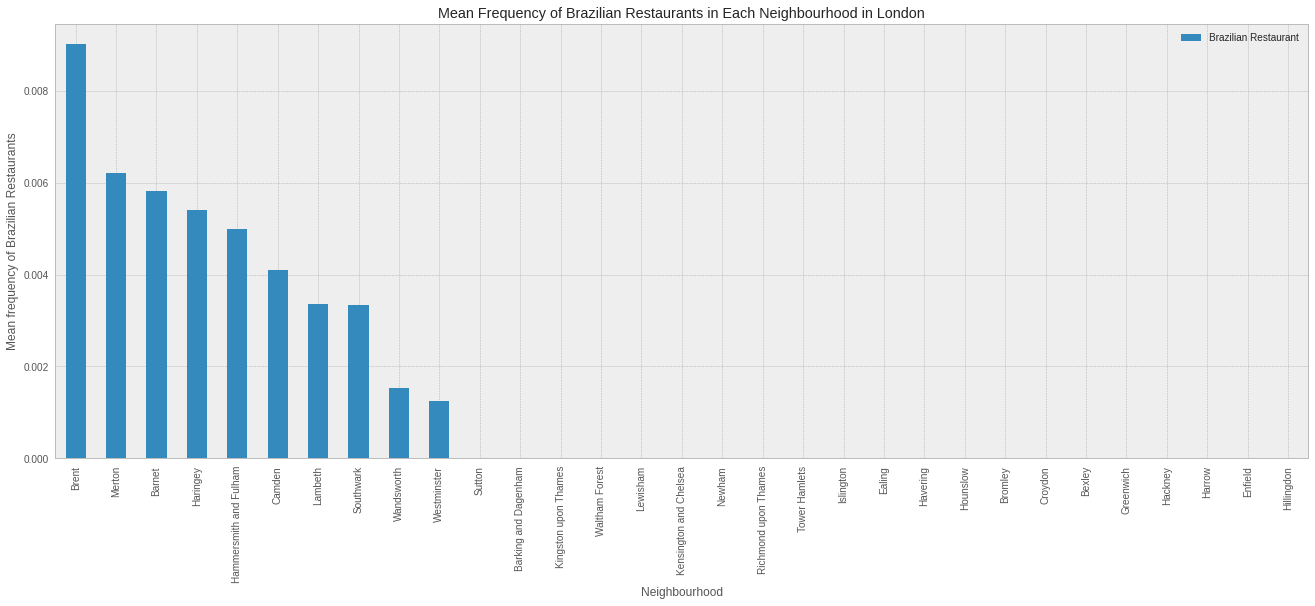

In [90]:
london_grouped.sort_values(by='Brazilian Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('bmh')
london_grouped.plot(kind='bar', figsize=(20,8))

plt.title('Mean Frequency of Brazilian Restaurants in Each Neighbourhood in London')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean frequency of Brazilian Restaurants')

plt.show()

### From the chart above we can infer that Brent is the neighbourhood with the highest mean frequency of Brazilian restaurants, therefore it is advisable to don't open a Brazilian restaurant in that area


### Plotting a bar graph to illustrate the distribution of income groups in each neighbourhood

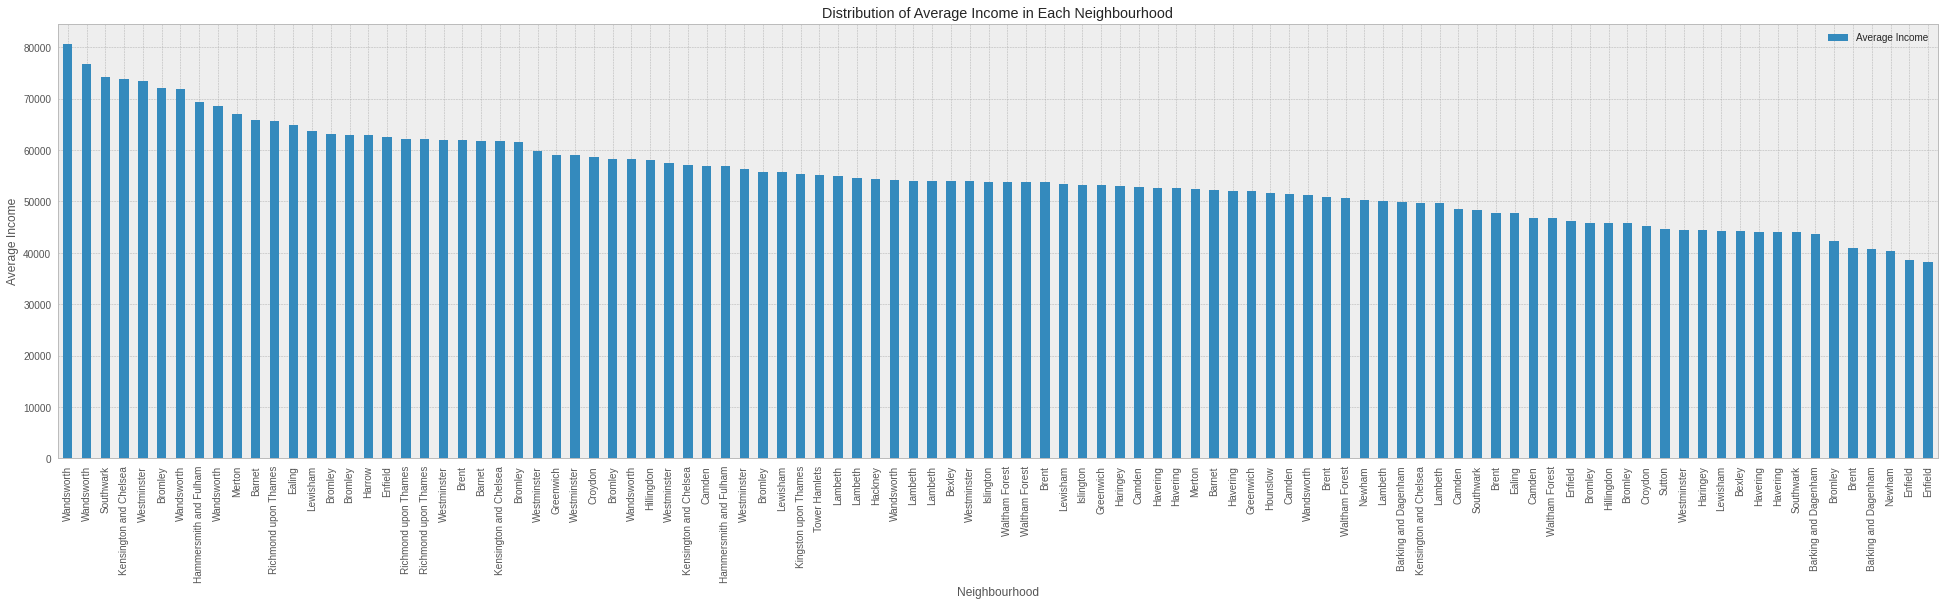

In [91]:
df3_income = df3[['District', 'Average Income']].set_index('District')

# sort by descending order
df3_income.sort_values(by='Average Income', ascending=False,  inplace=True)

#plot bar graph
df3_income.plot(kind='bar', figsize=(30,8))
plt.title('Distribution of Average Income in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Income')

plt.show()

### From the chart above, we can see that Wandsworth is the neighbourhood with the highest Average income

### Plotting a bar graph to illustrate the distribution of the nearest station in each neighbourhood. A factor to evaluate when opening a restaurant is the distance to the nearest station. For people without a car in a big city it is an important factor to reach the chosen restaurant as it will motivate them to visit.

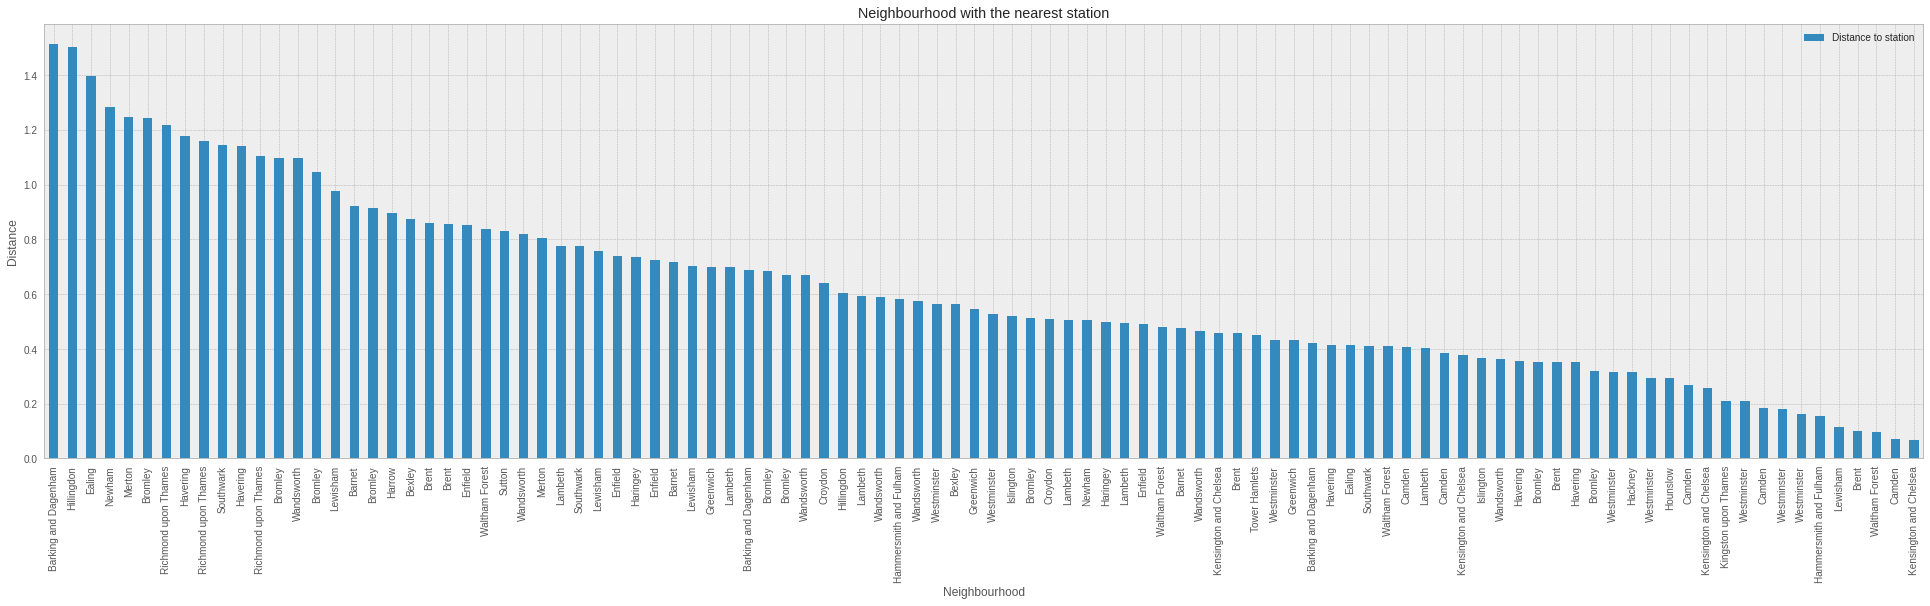

In [93]:
df3_nstation = df3[['District', 'Distance to station']].set_index('District')

# sort by descending order
df3_nstation.sort_values(by='Distance to station', ascending=False,  inplace=True)

#plot bar graph
df3_nstation.plot(kind='bar', figsize=(30,8))
plt.title('Neighbourhood with the nearest station')
plt.xlabel('Neighbourhood')
plt.ylabel('Distance')

plt.show()

### Barking and Dagenham is the neighbourhood with the nearest distance to the station. 

### Now, we are going to get a final dataframe to implement the cluster analysis

In [94]:
# to get the final dataframe we need to merge the df3 and the london_grouped.
#first we need to rename the District column to Neighbourhood

df4 = df3.rename(columns={'District': 'Neighbourhood'})
df4.head()

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income
128037,Westminster,51.528918,-0.206048,71.0,20.0,0.565596,44500
5192,Bromley,51.425513,0.052632,34.0,17.0,1.098220,45800
50057,Hackney,51.528557,-0.089805,11.0,10.0,0.315468,54300
109259,Lambeth,51.455669,-0.113461,9.0,5.0,0.777299,54000
73349,Brent,51.582646,-0.274947,57.0,19.0,0.353669,50900


In [95]:
# Merging london_grouped with df4 with the renamed first column

df_final = pd.merge(df4, london_grouped, on='Neighbourhood')

In [96]:
df_final

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant
0,Westminster,51.528918,-0.206048,71.0,20.0,0.565596,44500,0.00125
1,Westminster,51.496019,-0.137685,46.0,27.0,0.433721,57500,0.00125
2,Westminster,51.522106,-0.149017,3.0,1.0,0.316775,73500,0.00125
3,Westminster,51.513050,-0.131427,5.0,3.0,0.294475,54000,0.00125
4,Westminster,51.535685,-0.171829,6.0,2.0,0.180020,59900,0.00125
...,...,...,...,...,...,...,...,...
95,Barking and Dagenham,51.538752,0.090788,116.0,35.0,0.688178,49900,0.00000
96,Barking and Dagenham,51.564448,0.131013,61.0,24.0,0.423293,40800,0.00000
97,Tower Hamlets,51.530888,-0.063582,118.0,50.0,0.452014,55100,0.00000
98,Hammersmith and Fulham,51.491253,-0.207484,6.0,5.0,0.154938,56900,0.00500


### We implement our clustering using PYCARET library

In [97]:
!pip install pycaret

     |████████████████████████████████| 266kB 9.3MB/s 
     |████████████████████████████████| 14.2MB 206kB/s 
     |████████████████████████████████| 112kB 45.2MB/s 
     |████████████████████████████████| 256kB 49.1MB/s 
     |████████████████████████████████| 174kB 49.9MB/s 
     |████████████████████████████████| 276kB 60.9MB/s 
     |████████████████████████████████| 2.0MB 50.2MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 1.7MB 37.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 1.4MB 40.6MB/s 
     |████████████████████████████████| 6.8MB 17.5MB/s 
     |████████████████████████████████| 153kB 59.2MB/s 
     |████████████████████████████████| 1.1MB 33.3MB/s 
     |████████████████████████████████| 174kB 43.2MB

In [99]:
# this is a code to display interactive visuals with Pycaret

from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


### Setting up Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials)

In [101]:
#we import the clustering model of pycaret

from pycaret.clustering import *

exp_clu101 = setup(df_final, normalize = True, 
                   ignore_features = ['Neighbourhood'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(100, 8)"
2,Missing Values,False
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(100, 7)"
9,CPU Jobs,-1


### Now we create and train the clustering model

In [102]:
# we are going to choose Kmeans clustering model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1914,23.4494,1.2755,0,0,0


In [103]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


### As we can see from the above, at the moment the default clusters are 4, later with the elbow method we will find the ideal number of clusters.

### Now that we have created our model, we will have to assign the cluster labels to our dataset (100 rows).

In [104]:
# Assign the labels with assign_model function

kmean_results = assign_model(kmeans)
kmean_results.head()

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
0,Westminster,51.528918,-0.206048,71.0,20.0,0.565596,44500,0.00125,Cluster 1
1,Westminster,51.496019,-0.137685,46.0,27.0,0.433721,57500,0.00125,Cluster 0
2,Westminster,51.522106,-0.149017,3.0,1.0,0.316775,73500,0.00125,Cluster 0
3,Westminster,51.513050,-0.131427,5.0,3.0,0.294475,54000,0.00125,Cluster 0
4,Westminster,51.535685,-0.171829,6.0,2.0,0.180020,59900,0.00125,Cluster 0


In [107]:
kmean_results['Cluster'].value_counts()

Cluster 0    43
Cluster 1    38
Cluster 2    18
Cluster 3     1
Name: Cluster, dtype: int64

### Plotting clusters: 

We can have an initial look to the clusters plot and how they are represented. We will also check the elbow method to identify the right n_cluster.

In [111]:
# Simple plotting of the clusters

plot_model(kmeans, plot='cluster' )

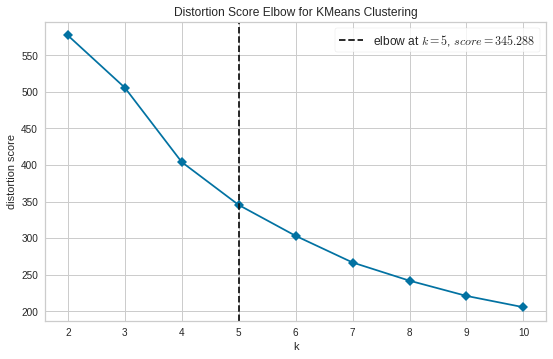

In [112]:
# Elbow method plotting to identify the right number of clusters

plot_model(kmeans, plot= 'elbow')

### Based on the elbow method, it might be more efficient setting the mode kmeans model with 5 nclusters and not 4.

In [124]:
# Building the model with 5 clusters

kmeans5 = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1968,24.3981,1.2509,0,0,0


In [125]:
print(kmeans5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [126]:
# Assign the labels with assign_model function with newly created 6 clusters

kmeans5_results = assign_model(kmeans5)
kmeans5_results.head()

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
0,Westminster,51.528918,-0.206048,71.0,20.0,0.565596,44500,0.00125,Cluster 1
1,Westminster,51.496019,-0.137685,46.0,27.0,0.433721,57500,0.00125,Cluster 3
2,Westminster,51.522106,-0.149017,3.0,1.0,0.316775,73500,0.00125,Cluster 3
3,Westminster,51.513050,-0.131427,5.0,3.0,0.294475,54000,0.00125,Cluster 3
4,Westminster,51.535685,-0.171829,6.0,2.0,0.180020,59900,0.00125,Cluster 3


### Let's plot the clusters with 5 nclusters

In [127]:
plot_model(kmeans5)

### Visualizing the clusters on the map

1) To apply the color scheme properly, we need to transform the Cluster column to an integer

2) Visualizing the map

In [ ]:
# trasforming the column Cluster into integers

kmeans5_results['Cluster'] = kmeans5_results['Cluster'].str.replace('Cluster', '')

kmeans5_results['Cluster'] = pd.to_numeric(kmeans5_results['Cluster'], errors='coerce')

In [143]:
kmeans5_results.dtypes

Neighbourhood            object
Latitude                float64
Longitude               float64
Population              float64
Households              float64
Distance to station     float64
Average Income            int64
Brazilian Restaurant    float64
Cluster                   int64
dtype: object

In [144]:
# Create the map

kclusters = 5

map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kmeans5_results['Latitude'], kmeans5_results['Longitude'], kmeans5_results['Neighbourhood'], kmeans5_results['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster -1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyze the 5 clusters

### Cluster 0

In [145]:
kmeans5_results.loc[kmeans5_results['Cluster'] == 0]

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
8,Bromley,51.425513,0.052632,34.0,17.0,1.098220,45800,0.0,0
9,Bromley,51.399587,0.100309,71.0,28.0,0.683057,42300,0.0,0
10,Bromley,51.430848,0.045822,35.0,11.0,1.045150,45800,0.0,0
32,Waltham Forest,51.584746,-0.033925,30.0,11.0,0.409922,50700,0.0,0
33,Waltham Forest,51.582277,-0.002204,89.0,31.0,0.478209,53700,0.0,0
34,Waltham Forest,51.563486,-0.015653,6.0,6.0,0.837416,46700,0.0,0
35,Waltham Forest,51.585813,-0.001676,58.0,29.0,0.097137,53700,0.0,0
40,Enfield,51.657057,-0.020592,1.0,1.0,0.723715,38700,0.0,0
42,Enfield,51.666158,-0.040539,76.0,30.0,0.853476,38300,0.0,0
43,Enfield,51.616572,-0.100123,16.0,5.0,0.737417,46200,0.0,0


### Cluster 1

In [146]:
kmeans5_results.loc[kmeans5_results['Cluster'] == 1]

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
0,Westminster,51.528918,-0.206048,71.0,20.0,0.565596,44500,0.001250,1
18,Lambeth,51.455669,-0.113461,9.0,5.0,0.777299,54000,0.003367,1
21,Lambeth,51.455202,-0.109609,63.0,27.0,0.506102,54000,0.003367,1
22,Lambeth,51.489647,-0.112059,2.0,1.0,0.495755,54600,0.003367,1
23,Lambeth,51.463865,-0.124353,22.0,9.0,0.402040,54900,0.003367,1
24,Brent,51.582646,-0.274947,57.0,19.0,0.353669,50900,0.009009,1
25,Brent,51.533333,-0.206048,92.0,46.0,0.101633,53700,0.009009,1
26,Brent,51.566621,-0.319504,11.0,5.0,0.860764,61900,0.009009,1
27,Brent,51.549053,-0.310892,69.0,24.0,0.457962,47800,0.009009,1
28,Brent,51.546484,-0.263667,62.0,19.0,0.857033,40900,0.009009,1


### Cluster 2

In [147]:
kmeans5_results.loc[kmeans5_results['Cluster'] == 2]

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
14,Bromley,51.362141,0.090192,73.0,38.0,1.241690,61600,0.000000,2
19,Lambeth,51.449614,-0.139185,83.0,29.0,0.697894,49700,0.003367,2
20,Lambeth,51.429065,-0.088232,102.0,36.0,0.594626,50100,0.003367,2
38,Kensington and Chelsea,51.487289,-0.188915,109.0,81.0,0.458343,57100,0.000000,2
50,Wandsworth,51.428941,-0.172968,148.0,53.0,0.363703,51300,0.001538,2
52,Wandsworth,51.471192,-0.150287,77.0,36.0,0.465168,54100,0.001538,2
56,Southwark,51.478168,-0.095108,127.0,45.0,1.143710,44000,0.003333,2
61,Sutton,51.357886,-0.139529,117.0,38.0,0.832058,44600,0.000000,2
67,Lewisham,51.429587,0.036631,144.0,63.0,0.976703,44200,0.000000,2
68,Lewisham,51.450695,-0.012703,173.0,66.0,0.756707,55700,0.000000,2


### Cluster 3

In [148]:
kmeans5_results.loc[kmeans5_results['Cluster'] == 3]

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
1,Westminster,51.496019,-0.137685,46.0,27.0,0.433721,57500,0.001250,3
2,Westminster,51.522106,-0.149017,3.0,1.0,0.316775,73500,0.001250,3
3,Westminster,51.513050,-0.131427,5.0,3.0,0.294475,54000,0.001250,3
4,Westminster,51.535685,-0.171829,6.0,2.0,0.180020,59900,0.001250,3
5,Westminster,51.512436,-0.113124,4.0,1.0,0.160563,59000,0.001250,3
6,Westminster,51.497664,-0.151261,32.0,17.0,0.526160,56300,0.001250,3
7,Westminster,51.489636,-0.136115,9.0,6.0,0.208241,61900,0.001250,3
11,Bromley,51.406526,0.007654,36.0,17.0,0.353919,63100,0.000000,3
12,Bromley,51.403588,0.036137,55.0,21.0,0.669057,62900,0.000000,3
13,Bromley,51.408445,0.056699,26.0,11.0,0.321041,72000,0.000000,3


### Cluster 4

In [149]:
kmeans5_results.loc[kmeans5_results['Cluster'] == 4]

,Neighbourhood,Latitude,Longitude,Population,Households,Distance to station,Average Income,Brazilian Restaurant,Cluster
63,Hillingdon,51.533017,-0.479713,1129.0,0.0,1.50396,45800,0.0,4
